<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-13 18:29:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.1MB/s    in 2.5s    

2025-07-13 18:29:57 (61.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



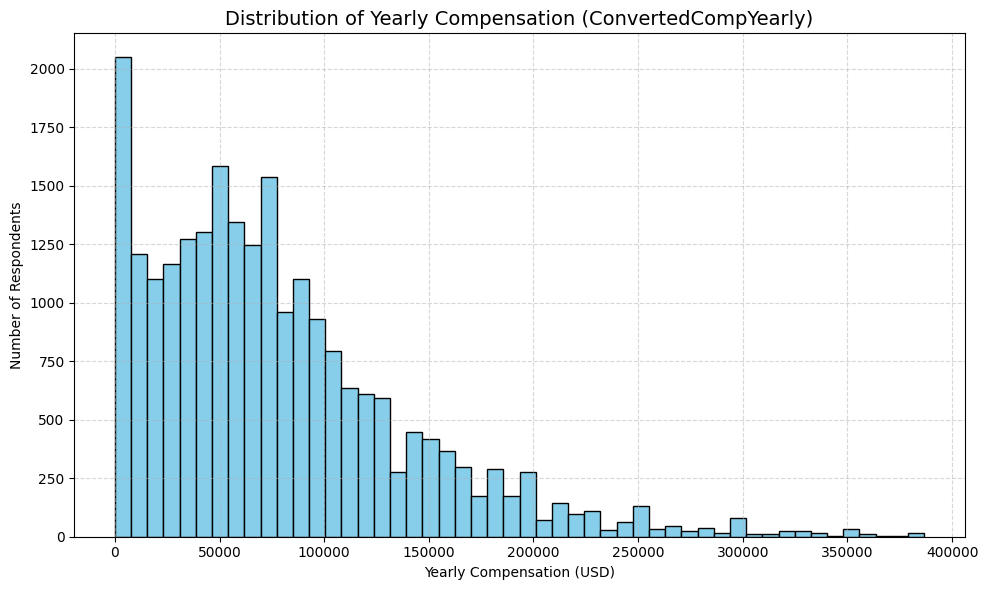

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop missing compensation values
df_comp = df['ConvertedCompYearly'].dropna()

# Optional: Filter out extreme values (e.g., top 1%) to improve readability
df_comp = df_comp[df_comp < df_comp.quantile(0.99)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp, bins=50, color='skyblue', edgecolor='black')

# Formatting
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



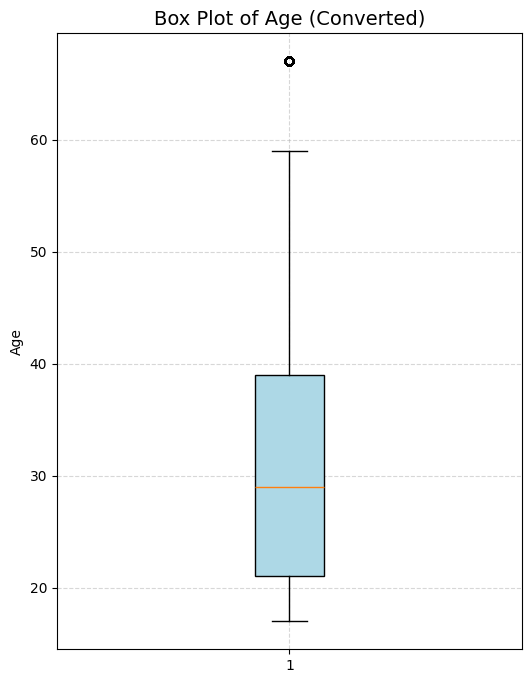

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Define a function to convert age group to numeric midpoint
def age_to_numeric(age_str):
    if isinstance(age_str, str):
        if '-' in age_str:
            parts = age_str.replace(' years old', '').split('-')
            return (int(parts[0]) + int(parts[1])) // 2
        elif 'Under' in age_str:
            return 17
        elif '65' in age_str:
            return 67
    return None

# Apply the conversion
df['AgeNum'] = df['Age'].apply(age_to_numeric)

# Drop NaN values
df_cleaned = df['AgeNum'].dropna()

# Plot the boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(df_cleaned, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Formatting
plt.title('Box Plot of Age (Converted)', fontsize=14)
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



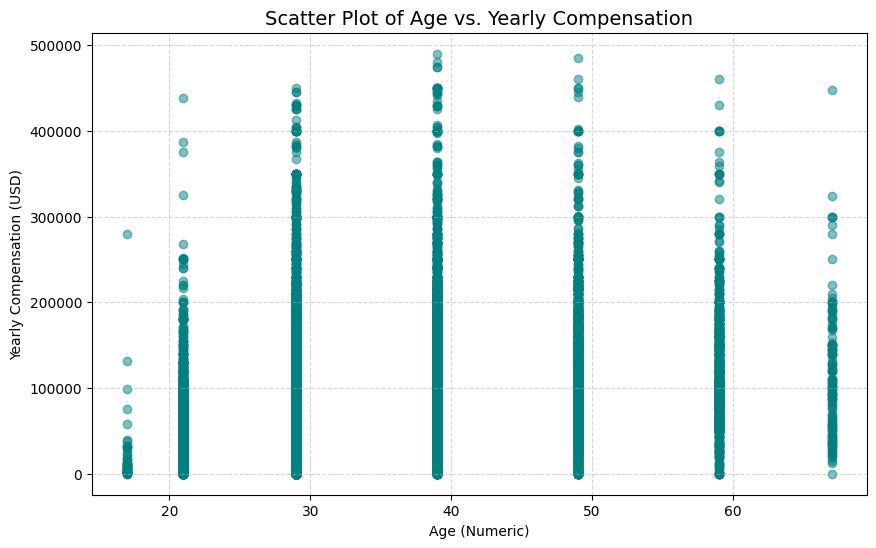

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Convert Age column to numeric values
def age_to_numeric(age_str):
    if isinstance(age_str, str):
        if '-' in age_str:
            parts = age_str.replace(' years old', '').split('-')
            return (int(parts[0]) + int(parts[1])) // 2
        elif 'Under' in age_str:
            return 17
        elif '65' in age_str:
            return 67
    return None

df['Age_numeric'] = df['Age'].apply(age_to_numeric)

# Filter data for valid entries
df_filtered = df[['Age_numeric', 'ConvertedCompYearly']].dropna()
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 500000]  # remove extreme outliers

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age_numeric'], df_filtered['ConvertedCompYearly'], alpha=0.5, color='teal')

# Formatting
plt.title('Scatter Plot of Age vs. Yearly Compensation', fontsize=14)
plt.xlabel('Age (Numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


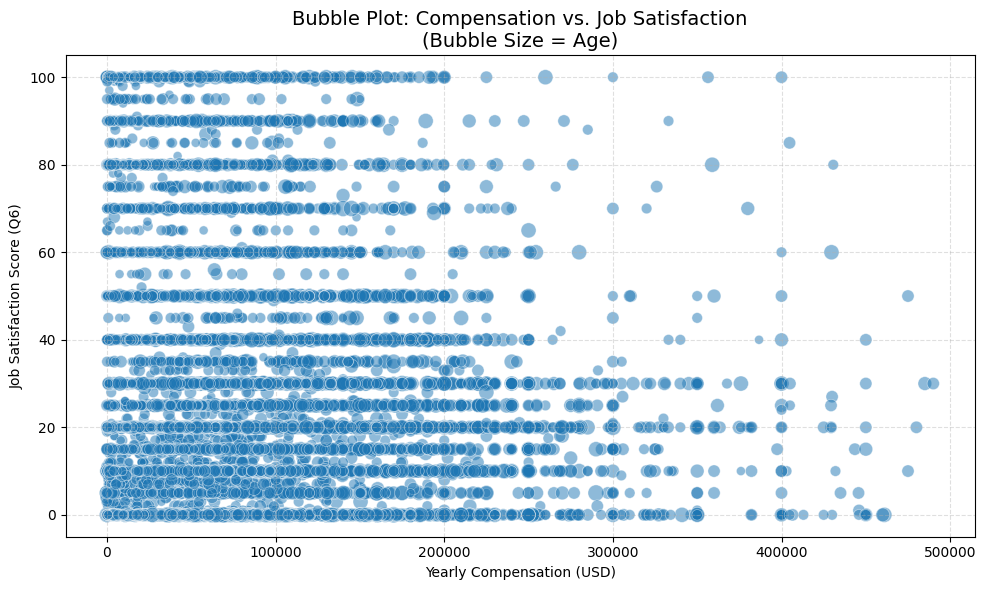

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Convert Age to numeric
def age_to_numeric(age_str):
    if isinstance(age_str, str):
        if '-' in age_str:
            parts = age_str.replace(' years old', '').split('-')
            return (int(parts[0]) + int(parts[1])) // 2
        elif 'Under' in age_str:
            return 17
        elif '65' in age_str:
            return 67
    return None

df['Age_numeric'] = df['Age'].apply(age_to_numeric)

# Drop missing values for relevant columns
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()

# Remove outliers for clearer visualization
bubble_df = bubble_df[bubble_df['ConvertedCompYearly'] < 500000]

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['Age_numeric'] * 2,  # Scale bubble size
    alpha=0.5,
    edgecolors='w',
    linewidths=0.5
)

# Formatting
plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (Q6)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



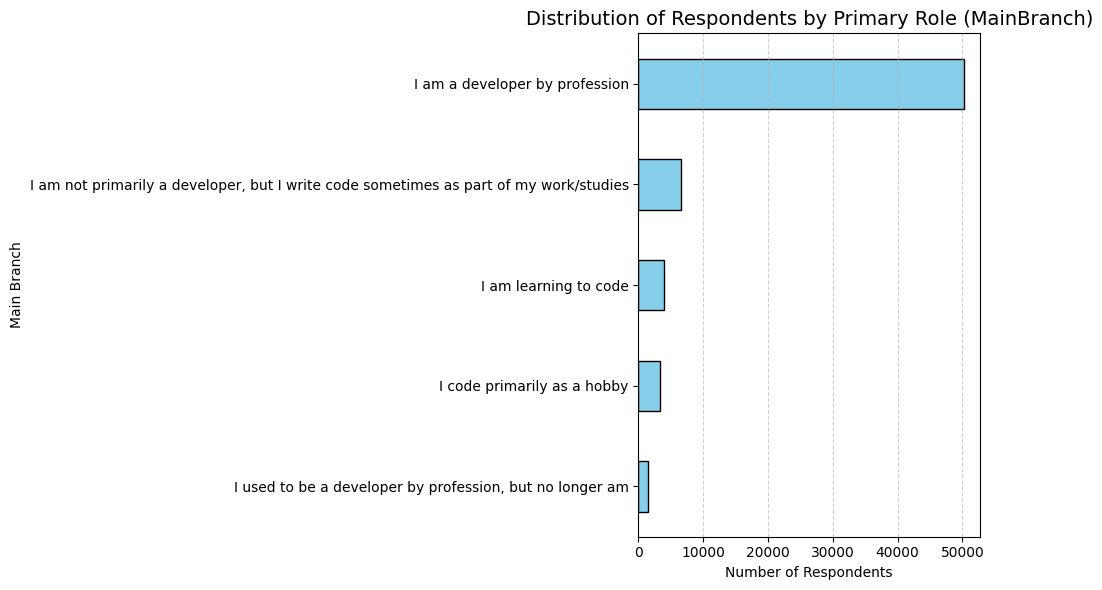

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Count the frequency of each MainBranch category
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Formatting
plt.title('Distribution of Respondents by Primary Role (MainBranch)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in LanguageWantToWorkWith
lang_data = df['LanguageWantToWorkWith'].dropna()

# Split multiple selections and flatten the list
from collections import Counter
all_langs = lang_data.str.split(';').sum()
lang_counts = Counter(all_langs)

# Get the top 5 most common languages
top_5_langs = dict(lang_counts.most_common(5))

# Create the vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_5_langs.keys(), top_5_langs.values(), color='mediumpurple', edgecolor='black')

# Add labels and title
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Define age group order for consistency in plotting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Ensure Age column is categorical with proper order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Drop missing values in JobSatPoints_6 and JobSatPoints_7 for fair comparison
df_filtered = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by age and calculate median satisfaction scores
grouped = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Reindex to maintain age order even if some groups are missing
grouped = grouped.reindex(age_order)

# Plotting the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Labeling the chart
plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Job Satisfaction Points')
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values in the DatabaseHaveWorkedWith column
df_dbs = df['DatabaseHaveWorkedWith'].dropna()

# Split entries and count each database individually
all_dbs = df_dbs.str.split(';').explode().str.strip()
db_counts = all_dbs.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar')

# Labeling the chart
plt.title('Most Commonly Used Databases by Respondents')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values in Age and Compensation
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Group by Age and calculate median compensation
grouped = df_filtered.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue', edgecolor='black')

# Labeling
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Count number of respondents per country
country_counts = df['Country'].value_counts().head(15)  # Top 15 countries for readability

# Plotting
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='teal', edgecolor='black')

# Labeling
plt.title('Top 15 Respondent Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
